import numpy as np
from sklearn.ensemble import RandomForestClassifier
# ^^^ pyforest auto-imports - don't write above this line
# Happy Customers Prediction

In [1]:
#load data 
import pandas as pd
h_customer = pd.read_csv('ACME-HappinessSurvey2020.csv', header=0)
h_customer.head()

,Y,X1,X2,X3,X4,X5,X6
0,0,3,3,3,4,2,4
1,0,3,2,3,5,4,3
2,1,5,3,3,3,3,5
3,0,5,4,3,3,3,5
4,0,5,4,3,3,3,5


In [2]:
# Lets label the columns - helps to know what y or x1, x2 etc are

h_customer =h_customer.rename(columns={'Y': 'happy', 'X1': 'order_ontime', 'X2': 'order_content_as_expected', 'X3': 'ordered_everything', 'X4': 'paid_good_price', 'X5': 'satisfied_courier', 'X6': 'easy_app'})
h_customer

,happy,order_ontime,order_content_as_expected,ordered_everything,paid_good_price,satisfied_courier,easy_app
0,0,3,3,3,4,2,4
1,0,3,2,3,5,4,3
2,1,5,3,3,3,3,5
3,0,5,4,3,3,3,5
4,0,5,4,3,3,3,5
...,...,...,...,...,...,...,...
121,1,5,2,3,4,4,3
122,1,5,2,3,4,2,5
123,1,5,3,3,4,4,5
124,0,4,3,3,4,4,5


In [3]:
# it looks like feedback from custmers (features) is on 1-5 scale lets check
h_customer.describe()

,happy,order_ontime,order_content_as_expected,ordered_everything,paid_good_price,satisfied_courier,easy_app
count,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000
mean,0.547619,4.333333,2.531746,3.309524,3.746032,3.650794,4.253968
std,0.499714,0.800000,1.114892,1.023440,0.875776,1.147641,0.809311
min,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,4.000000,2.000000,3.000000,3.000000,3.000000,4.000000
50%,1.000000,5.000000,3.000000,3.000000,4.000000,4.000000,4.000000
75%,1.000000,5.000000,3.000000,4.000000,4.000000,4.000000,5.000000
max,1.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [4]:
h_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126 entries, 0 to 125
Data columns (total 7 columns):
happy                        126 non-null int64
order_ontime                 126 non-null int64
order_content_as_expected    126 non-null int64
ordered_everything           126 non-null int64
paid_good_price              126 non-null int64
satisfied_courier            126 non-null int64
easy_app                     126 non-null int64
dtypes: int64(7)
memory usage: 7.0 KB


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

[Text(0.5, 1, 'Correlations: Customer Happiness')]

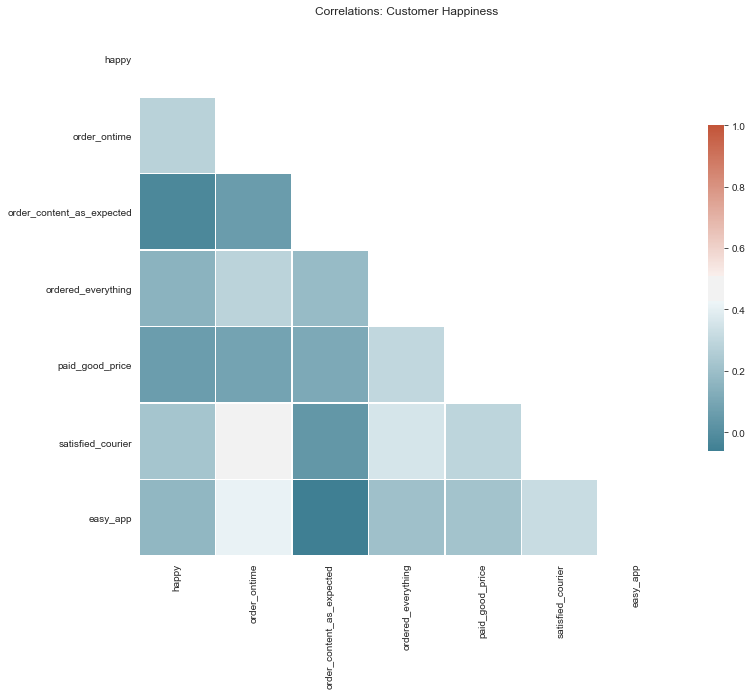

In [6]:
#lets do some visualization to get a sense of the data we have 
import seaborn as sns
import matplotlib.pyplot as plt


# Compute correlations
corr = h_customer.corr()


# Set up  matplotlib figure
f, ax = plt.subplots(figsize=(12, 12))

# Exclude duplicate correlations by masking uper right values
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set background color / chart style
sns.set_style(style = 'white')


# Add diverging colormap
#cmap =sns.diverging_palette(150, 275, s=80, l=55, n=12)
cmap = sns.diverging_palette(220, 20, sep=20, as_cmap=True)

# Draw correlation plot
sns.heatmap(corr, mask=mask, cmap=cmap, 
        square=True,
        linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)
ax.set (title='Correlations: Customer Happiness')

In [7]:
#lets see if there are any null values 
h_customer.isnull().sum()


happy                        0
order_ontime                 0
order_content_as_expected    0
ordered_everything           0
paid_good_price              0
satisfied_courier            0
easy_app                     0
dtype: int64

There are no null values, that is great. 

In [8]:
#also, we need to check if there are imbalances in the number of happy and unhappy rows.

happy, unhappy = h_customer.happy.value_counts()
happy, unhappy

(69, 57)

This is more or less well balanced, we do not need to balance the sample. 

In [9]:
# lets separate target var and features 
x= h_customer.drop(['happy'], axis=1)
x


,order_ontime,order_content_as_expected,ordered_everything,paid_good_price,satisfied_courier,easy_app
0,3,3,3,4,2,4
1,3,2,3,5,4,3
2,5,3,3,3,3,5
3,5,4,3,3,3,5
4,5,4,3,3,3,5
...,...,...,...,...,...,...
121,5,2,3,4,4,3
122,5,2,3,4,2,5
123,5,3,3,4,4,5
124,4,3,3,4,4,5


In [10]:
y=h_customer['happy'].values
y

array([0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0], dtype=int64)

In [11]:
#lets change all the features to binary class using get_dummies
x=x.astype('category')
x=pd.get_dummies(x)
x

,order_ontime_1,order_ontime_3,order_ontime_4,order_ontime_5,order_content_as_expected_1,order_content_as_expected_2,order_content_as_expected_3,order_content_as_expected_4,order_content_as_expected_5,ordered_everything_1,...,satisfied_courier_1,satisfied_courier_2,satisfied_courier_3,satisfied_courier_4,satisfied_courier_5,easy_app_1,easy_app_2,easy_app_3,easy_app_4,easy_app_5
0,0,1,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
1,0,1,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
2,0,0,0,1,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
3,0,0,0,1,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
4,0,0,0,1,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121,0,0,0,1,0,1,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
122,0,0,0,1,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
123,0,0,0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
124,0,0,1,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1


In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import f_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score
logit=LogisticRegression(max_iter=10000)
pred=logit.fit(x,y)

In [13]:
pred.score(x,y)

0.6507936507936508

In [14]:
p_values=f_regression(x,y)[1]
p_values

array([2.72953710e-01, 1.50523124e-01, 2.31239855e-02, 6.40569555e-04,
       7.34309307e-01, 3.40961937e-01, 1.00000000e+00, 2.29585873e-01,
       5.51986568e-01, 5.18786173e-01, 7.06906555e-01, 1.39339234e-01,
       1.11498922e-01, 3.79835339e-01, 1.98063859e-01, 1.12784828e-01,
       5.82557306e-01, 7.25964051e-01, 5.60384544e-01, 1.54413734e-01,
       3.47530718e-01, 3.38278959e-01, 8.22567652e-01, 3.70509442e-02,
       3.65504517e-01, 2.72953710e-01, 1.50850772e-02, 6.43658340e-01,
       1.76115464e-01])

In [15]:
#i like statsmodels result table, lets explore the coefficents mroe
import statsmodels.api as sm
OLS_reg=sm.OLS(y,x)
result =OLS_reg.fit()
result.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.233
Model:                            OLS   Adj. R-squared:                  0.060
Method:                 Least Squares   F-statistic:                     1.347
Date:                Mon, 14 Sep 2020   Prob (F-statistic):              0.158
Time:                        16:02:45   Log-Likelihood:                -74.167
No. Observations:                 126   AIC:                             196.3
Df Residuals:                     102   BIC:                             264.4
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
order_ontime_1                 -0.4624      0.509     -0.909      0.365      -1.471       0.546
order_ontime_3                  0.1943      0.148      1.313      0.192      -0.099       0.488
order_ontime_4                  0.0170      0.152      0.112      0.911      -0.285       0.319
order_ontime_5                  0.4376      0.155      2.830      0.006       0.131       0.744
order_content_as_expected_1     0.0730      0.106      0.687      0.494      -0.138       0.284
order_content_as_expected_2     0.0916      0.103      0.887      0.377      -0.113       0.296
order_content_as_expected_3     0.0441      0.099      0.447      0.656      -0.151       0.240
order_content_as_expected_4    -0.1246      0.125     -0.999      0.320      -0.372       0.123
order_content_as_expected_5     0.1024      0.209      0.490      0.625      -0.312       0.517
ordered_everything_1           -0.0536      0.193     -0.278      0.782      -0.436       0.329
ordered_everything_2           -0.0332      0.139     -0.239      0.812      -0.309       0.243
ordered_everything_3            0.0393      0.092      0.425      0.672      -0.144       0.223
ordered_everything_4            0.2159      0.116      1.858      0.066      -0.015       0.446
ordered_everything_5            0.0179      0.164      0.109      0.913      -0.308       0.344
paid_good_price_1               0.4141      0.482      0.860      0.392      -0.541       1.369
paid_good_price_2              -0.3321      0.234     -1.422      0.158      -0.795       0.131
paid_good_price_3              -0.0135      0.152     -0.089      0.929      -0.315       0.288
paid_good_price_4               0.0736      0.146      0.505      0.615      -0.215       0.362
paid_good_price_5               0.0444      0.159      0.279      0.781      -0.271       0.359
satisfied_courier_1             0.1397      0.231      0.604      0.547      -0.319       0.598
satisfied_courier_2            -0.0666      0.142     -0.470      0.639      -0.348       0.214
satisfied_courier_3             0.0403      0.136      0.296      0.768      -0.229       0.310
satisfied_courier_4            -0.0485      0.114     -0.424      0.672      -0.275       0.178
satisfied_courier_5             0.1215      0.127      0.955      0.342      -0.131       0.374
easy_app_1                     -0.0220      0.729     -0.030      0.976      -1.468       1.424
easy_app_2                     -0.1142      0.574     -0.199      0.843      -1.253       1.024
easy_app_3                     -0.0386      0.209     -0.184      0.854      -0.454       0.377
easy_app_4                      0.3169      0.185      1.712      0.090      -0.050       0.684
easy_app_5                      0.0443      0.185      0.239      0.811      -0.323       0.412
===========

At this point it looks like delivering orders ontime (ordering everything a customer wanted, and having an app that makes it easy to order seems to be the most significant predicting features). An interesting observation is that sometimes we find _4 to be signficant than _5, this can only be due to small sample size. 


## Machine learning modelling

In [16]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
logit.fit(x_train, y_train)
y_pred=logit.predict(x_test)
print('Accuracy Score: ', accuracy_score(y_pred, y_test))



Accuracy Score:  0.5


In [31]:
print('F1 Score: \n', f1_score(y_pred, y_test))

F1 Score: 
 0.5365853658536586


Ok. splitting the small data further to training and test dataset seems to take away the power of its predictive value. At this point our model's predictive power is no better than a random guess. 

Lets try if we can do some hypertuning to improve the accuracy. 

In [24]:
from sklearn.model_selection import GridSearchCV

# define parameter values
solvers = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
penalty = ['none', 'l1', 'l2', 'elasticnet']
c_values = [100, 10, 1.0, 0.1, 0.01]

# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
grid_search = GridSearchCV(estimator=logit, param_grid=grid, n_jobs=-1, cv=5, scoring='accuracy', error_score=0)
grid_result = grid_search.fit(x_train, y_train)

# summarize results
print(f"Best score on training data: {grid_result.best_score_} using {grid_result.best_params_}")

Best score on training data: 0.6026143790849673 using {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}


In [42]:
# Import necessary modules
from sklearn.model_selection import cross_val_score

# Compute cross-validated scores: 
cv_accuracy = cross_val_score(logit, x_test, y_test, cv=5, scoring='accuracy')

# Print list of accuracy scores
print("Accuracy scores computed using 5-fold cross-validation: {}".format(cv_accuracy))

Accuracy scores computed using 5-fold cross-validation: [0.625      0.625      0.75       0.57142857 0.71428571]


In [45]:
cv_avg_score=cv_accuracy.sum() / 5
cv_avg_score

0.6571428571428571

Ok. that improved but far from where we want to be, let me change and move away from logistic regression. 

In [36]:

def evaluate(x_train, x_test, y_train, y_test):
    #Names of models
    model_name_list = ['Random Forest',
                       'Gradient Boosted']
    model = np.arange(1, 4)
    train_accuracy = np.empty(len(model))
    test_accuracy = np.empty(len(model))
    # Instantiate the models
    model1 = RandomForestClassifier(n_estimators=100)
    model2 = GradientBoostingClassifier(n_estimators=100)
    results =pd.DataFrame(columns=['train_accuracy', 'test_accuracy'])    
    
    # Train and predict with each model
    for i, model in enumerate([model1, model2]):
        model.fit(x_train, y_train)
        
        train_accuracy=model.score(x_train, y_train)
        test_accuracy=model.score(x_test, y_test)
        
        model_name=model_name_list[i]
        results.loc[model_name, :] =[train_accuracy, test_accuracy]
    return results

In [37]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

results = evaluate(x_train, x_test, y_train, y_test)
results

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,train_accuracy,test_accuracy
Random Forest,0.943182,0.605263
Gradient Boosted,0.920455,0.552632


In [38]:
model = RandomForestClassifier(n_estimators=100)
model.fit(x_train, y_train)
y_pred=model.predict(x_test)
print('Accuracy Score: ', accuracy_score(y_pred, y_test))

Accuracy Score:  0.6052631578947368


In [39]:
print('F1 Score: \n', f1_score(y_pred, y_test))

F1 Score: 
 0.6341463414634146


Ok. That is better. Still we have more to work.

In [46]:
# Compute cross-validated scores: 
cv_accuracy = cross_val_score(model, x_test, y_test, cv=5, scoring='accuracy')

# Print list of accuracy scores
print("Accuracy scores computed using 5-fold cross-validation: {}".format(cv_accuracy))

Accuracy scores computed using 5-fold cross-validation: [0.875      0.875      0.875      0.42857143 0.71428571]


In [47]:
cv_avg_score=cv_accuracy.sum() / 5
cv_avg_score

0.7535714285714286